In [172]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
titanic_df = pd.read_csv('/content/drive/MyDrive/0 Colab Notebooks/DATASETS/titanic.csv')

In [174]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
data = titanic_df[['Pclass', 'Sex', 'Age', 'Survived', 'Parch', 'SibSp']]

In [177]:
data.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


In [178]:
data.Sex = data.Sex.map({'male':1, 'female':0})

<ipython-input-178-ef63f3ea877a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sex = data.Sex.map({'male':1, 'female':0})


In [179]:
data.sample(5)

,Pclass,Sex,Age,Survived,Parch,SibSp
477,3,1,29.0,0,0,1
396,3,0,31.0,0,0,0
100,3,0,28.0,0,0,0
593,3,0,NaN,0,2,0
774,2,0,54.0,1,3,1


In [195]:
data = data.dropna()

In [196]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

In [198]:
model = XGBClassifier()

In [199]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [200]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

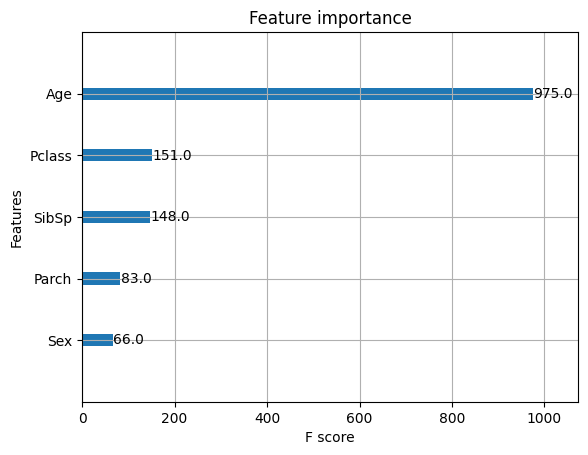

In [201]:
xgb.plot_importance(model, ax=plt.gca())

In [202]:
pred = model.predict(X_test)

In [203]:
X_test.loc[100]

Pclass     3.0
Sex        0.0
Age       28.0
Parch      0.0
SibSp      0.0
Name: 100, dtype: float64

In [204]:
pred[98:100]

array([0, 0])

In [205]:
model.score(X_test, y_test)

0.776536312849162

In [206]:
pred_train = model.predict(X_train)

In [207]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, pred_train)

array([[305,  12],
       [ 23, 195]])

In [208]:
model.score(X_train, y_train)

0.9345794392523364

In [214]:
train.loc[train.Survived==1, 'Survived'].sum()

342

Encoding

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [216]:
print('Missing value train:',train.isna().sum().sum())
print('Missing value test:',test.isna().sum().sum())

Missing value train: 866
Missing value test: 414


In [219]:
print('Duplicated data in train:',train.duplicated().sum())
print('Duplicated data in test:',test.duplicated().sum())

Duplicated data in train: 0
Duplicated data in test: 0


In [220]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [232]:
print('Total missing data: \n', testing.isna().sum())

Total missing data: 
 PassengerId    0
dtype: int64


In [222]:
def cleaner(data_train, data_test):


  trainning = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
  trainning.Embarked.fillna("S", inplace=True)

  columns = ['Age']
  for cols in columns:
    trainning[cols].fillna(trainning[cols].median(), inplace=True)

  testing = data_test.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

  return trainning, testing


trainning, testing = cleaner(train, test)


In [223]:
print('Total missing data: \n', trainning.isna().sum())

Total missing data: 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [224]:
labelEncoder = LabelEncoder()

col = ['Sex','Embarked']

for cols in col:
  trainning[cols] = labelEncoder.fit_transform(trainning[cols])

  print(labelEncoder.classes_)

trainning.head(5)

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Exploracion y limpieza de datos

In [225]:
train = trainning.sample(n=558)

In [226]:
train = pd.read_csv('/content/drive/MyDrive/0 Colab Notebooks/DATASETS/train.csv')
test = pd.read_csv('/content/drive/MyDrive/0 Colab Notebooks/DATASETS/test.csv')

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
train['Embarked'] = train['Embarked'].apply(lambda x: 'S'  if type(x) == float else x)

In [229]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [230]:
col_features = ['Pclass','Sex','Age','Parch','Embarked']

train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Age'] = train['Age'].astype(int)
train['Sex'] = train['Sex'].map({'male':0,'female':1})
train['Embarked'] = train['Embarked'].map({'C':0,'S':1,'Q':2})


test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Age'] = test['Age'].astype(int)
test['Sex'] = test['Sex'].map({'male':0,'female':1})
test['Embarked'] = test['Embarked'].map({'C':0,'S':1,'Q':2})

In [231]:
y = train['Survived']

X = train[col_features]
X_test = test[col_features]

gbc = GradientBoostingClassifier(learning_rate=0.1,n_estimators=130)
gbc.fit(X,y)

y_pred = gbc.predict(X_test)
y_pred

df_titanic =  pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
df_titanic.to_csv('/content/drive/MyDrive/0 Colab Notebooks/COMPETENCIA/PLM_submission.csv',index=False)